In [1]:
import glob
import shutil
import cv2 
from PIL import Image
import PIL
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split

import warnings
# Ignore waring
warnings.filterwarnings('ignore')


In [ ]:
emotion_path = ['/angry/*', '/disgust/*', '/fear/*', '/happy/*', '/sad/*', '/surprise/*', '/neutral/*']


In [ ]:
train_path = 'E:/A Study/Year3-2/MachineLearning/lab4/emotions_data/images/train'


In [ ]:
X = []
y= []
for i, path in enumerate(emotion_path):
  for name in glob.glob(train_path+path):
    img = cv2.imread(name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (48,48))
    X.append((img))
    y.append(i)
len(X)


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
print( X_train.shape, X_test.shape,y_train.shape,y_test.shape)

In [ ]:
X_train = X_train /255
X_test_scaled = X_test / 255

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
import cv2

In [7]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

In [ ]:
learning_rate = 0.0001  # Tốc độ học ban đầu

# Khởi tạo learning rate scheduler
optimizer1 = tf.keras.optimizers.Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer1, loss = 'categorical_crossentropy',metrics =['accuracy'])



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [10]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 179s 488ms/step - loss: 9.6246 - accuracy: 0.1686 - val_loss: 8.5466 - val_accuracy: 0.1816
Epoch 2/60
359/359 [==============================] - 29s 82ms/step - loss: 8.4652 - accuracy: 0.2153 - val_loss: 7.4930 - val_accuracy: 0.2235
Epoch 3/60
359/359 [==============================] - 29s 82ms/step - loss: 7.3868 - accuracy: 0.2423 - val_loss: 6.4248 - val_accuracy: 0.2807
Epoch 4/60
359/359 [==============================] - 30s 83ms/step - loss: 6.3658 - accuracy: 0.2583 - val_loss: 5.4589 - val_accuracy: 0.3331
Epoch 5/60
359/359 [==============================] - 30s 82ms/step - loss: 5.4080 - accuracy: 0.2926 - val_loss: 4.7317 - val_accuracy: 0.3275
Epoch 6/60
359/359 [==============================] - 29s 82ms/step - loss: 4.6157 - accuracy: 0.3119 - val_loss: 4.2784 - val_accuracy: 0.3135
Epoch 7/60
359/359 [==============================] - 30s 83ms/step - loss: 3.9306 - accuracy: 0.3566 - val_loss: 3.4045 - val_accurac

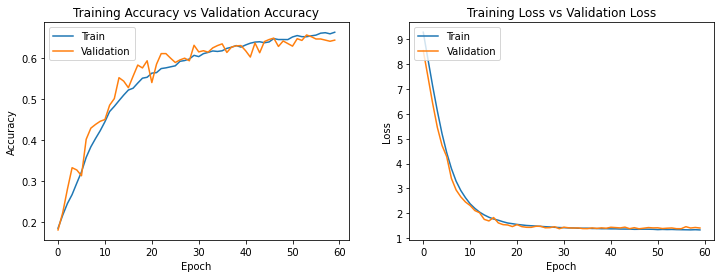

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
model.save('model_optimal.h5')

In [14]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [15]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[3.936475e-06, 0.0, 0.99999607, 0.0, 0.0, 0.0, 0.0]


In [16]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Fear


In [17]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 1s 53ms/step - loss: 1.4080 - accuracy: 0.6439
final train accuracy = 70.76 , validation accuracy = 64.39


In [18]:
model.save_weights('model_weights.h5')